<a href="https://colab.research.google.com/github/deltania/Orbit_Academy/blob/main/KNN_Algoritma_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O data.csv https://raw.githubusercontent.com/alifrzky123/belajar-orbit/17e51c35abc7bc52397430aea2f316856174755c/belajar_dataset/konsumen.csv

--2021-12-08 08:08:59--  https://raw.githubusercontent.com/alifrzky123/belajar-orbit/17e51c35abc7bc52397430aea2f316856174755c/belajar_dataset/konsumen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5321884 (5.1M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   5.08M  --.-KB/s    in 0.1s    

2021-12-08 08:09:00 (49.3 MB/s) - ‘data.csv’ saved [5321884/5321884]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv', delimiter = ';')
df.head()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI


In [4]:
df.dtypes

SALES DATE                 object
TYPE MOTOR                 object
COLOR                      object
KODE CUSTOMER              object
JENIS KELAMIN              object
TANGGAL LAHIR              object
KECAMATAN SURAT            object
KOTA SURAT                 object
PROPINSI                   object
STATUS RUMAH               object
JENIS PENJUALAN STNK       object
JENIS PENJUALAN SSU        object
BESAR DP                  float64
BESAR CICILAN             float64
LAMA CICILAN              float64
AGAMA                      object
PEKERJAAN                  object
PENGELUARAN                object
PENDIDIKAN                 object
KEBERSEDIAAN DIHUBUNGI     object
MERK MOTOR SBLMNYA         object
TYPE MOTOR SBLMNYA         object
SMH DIGUNAKAN UNTUK        object
YG MENGGUNAKAN SMH         object
HOBI                       object
KETERANGAN                 object
KEWARGANEGARAAN            object
dtype: object

In [5]:
df.columns

Index(['SALES DATE', 'TYPE MOTOR', 'COLOR', 'KODE CUSTOMER', 'JENIS KELAMIN',
       'TANGGAL LAHIR', 'KECAMATAN SURAT', 'KOTA SURAT', 'PROPINSI',
       'STATUS RUMAH', 'JENIS PENJUALAN STNK', 'JENIS PENJUALAN SSU',
       'BESAR DP', 'BESAR CICILAN', 'LAMA CICILAN', 'AGAMA', 'PEKERJAAN',
       'PENGELUARAN', 'PENDIDIKAN', 'KEBERSEDIAAN DIHUBUNGI',
       'MERK MOTOR SBLMNYA', 'TYPE MOTOR SBLMNYA', 'SMH DIGUNAKAN UNTUK',
       'YG MENGGUNAKAN SMH', 'HOBI', 'KETERANGAN', 'KEWARGANEGARAAN'],
      dtype='object')

In [6]:
df.isna().sum()

SALES DATE                    0
TYPE MOTOR                    0
COLOR                         0
KODE CUSTOMER                 0
JENIS KELAMIN                 0
TANGGAL LAHIR                 0
KECAMATAN SURAT               0
KOTA SURAT                    0
PROPINSI                      0
STATUS RUMAH                  0
JENIS PENJUALAN STNK          0
JENIS PENJUALAN SSU           0
BESAR DP                   7688
BESAR CICILAN              7688
LAMA CICILAN               7688
AGAMA                         0
PEKERJAAN                     0
PENGELUARAN                   0
PENDIDIKAN                    0
KEBERSEDIAAN DIHUBUNGI        0
MERK MOTOR SBLMNYA            0
TYPE MOTOR SBLMNYA            0
SMH DIGUNAKAN UNTUK           0
YG MENGGUNAKAN SMH            0
HOBI                          0
KETERANGAN                11354
KEWARGANEGARAAN               6
dtype: int64

In [7]:
x = df['TYPE MOTOR']
df = df.drop(columns=['TYPE MOTOR','BESAR DP', 'BESAR CICILAN', 'LAMA CICILAN', 'KETERANGAN','SALES DATE', 'TANGGAL LAHIR', 'KEWARGANEGARAAN', 'PROPINSI','KODE CUSTOMER',
                      'JENIS KELAMIN', 'KECAMATAN SURAT',
                      'KOTA SURAT', 'STATUS RUMAH', 'JENIS PENJUALAN STNK',
                      'JENIS PENJUALAN SSU', 'AGAMA','PENGELUARAN',
                      'PENDIDIKAN', 'KEBERSEDIAAN DIHUBUNGI', 'MERK MOTOR SBLMNYA',
                      'TYPE MOTOR SBLMNYA', 'SMH DIGUNAKAN UNTUK', 'YG MENGGUNAKAN SMH'])

In [8]:
x.head()

0    REVO FIT FI
1    REVO FIT FI
2    REVO FIT FI
3    REVO FIT FI
4    REVO FIT FI
Name: TYPE MOTOR, dtype: object

In [9]:
df.head()

,COLOR,PEKERJAAN,HOBI
0,HITAM,DOKTER,Adventure (Petualangan)
1,HITAM,"PEGAWAI SWASTA, INDUSTRI",Adventure (Petualangan)
2,HITAM,MAHASISWA / PELAJAR,Adventure (Petualangan)
3,HITAM,"PEGAWAI SWASTA, INDUSTRI",Makan
4,HITAM,MAHASISWA / PELAJAR,Adventure (Petualangan)


In [10]:
df.isna().sum()

COLOR        0
PEKERJAAN    0
HOBI         0
dtype: int64

In [11]:
list_1=list(df.columns)

In [12]:
df.columns

Index(['COLOR', 'PEKERJAAN', 'HOBI'], dtype='object')

In [13]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [16]:
df.head()

,COLOR,PEKERJAAN,HOBI
0,5,0,0
1,5,9,0
2,5,4,0
3,5,9,20
4,5,4,0


In [17]:
y=x
x=df

In [18]:
y.head()

0    REVO FIT FI
1    REVO FIT FI
2    REVO FIT FI
3    REVO FIT FI
4    REVO FIT FI
Name: TYPE MOTOR, dtype: object

In [19]:
x.head()

,COLOR,PEKERJAAN,HOBI
0,5,0,0
1,5,9,0
2,5,4,0
3,5,9,20
4,5,4,0


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [21]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

14892
3724
14892
3724


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Ks = 10
k = 10
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
ConfustionMx = [];
for n in range(1,k):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.49973147, 0.4906015 , 0.47099893, 0.48737916, 0.48308271,
       0.48764769, 0.47771214, 0.48388829, 0.48093448])

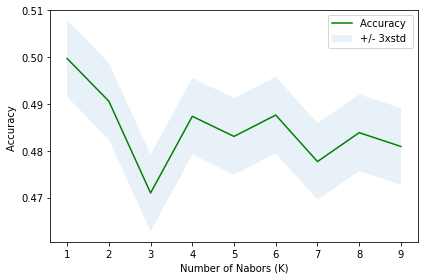

In [23]:
plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
knn=KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [25]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5540558689229116
Test set Accuracy:  0.4809344790547798


In [26]:
yhat = knn.predict(x_test)
yhat[0:5]

array(['ALL NEW SCOOPY', 'PCX 150 CBS', 'VARIO 125 CBS',
       'VARIO 125 CBS ISS', 'VARIO 150'], dtype=object)